# 29-8-24: Practical No. 3.4.5 : Regression using ScikitLearn.

## Masira Sajid Balouch |  SAP ID : 40776230001 |  Roll. No. : J001

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\Acer\Downloads\Student_Performance(1).csv")
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [3]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [4]:
unique_values = {col: data[col].unique() for col in data.columns}

for col, values in unique_values.items():
    print(f"Unique values in '{col}': {values}")

Unique values in 'Hours Studied': [7 4 8 5 3 6 2 1 9]
Unique values in 'Previous Scores': [99 82 51 52 75 78 73 45 77 89 91 79 47 72 83 54 96 74 85 61 62 84 94 90
 44 70 67 97 59 55 68 63 46 76 43 81 93 98 48 92 64 88 60 87 40 69 80 95
 49 50 53 71 56 58 66 65 57 41 42 86]
Unique values in 'Extracurricular Activities': ['Yes' 'No']
Unique values in 'Sleep Hours': [9 4 7 5 8 6]
Unique values in 'Sample Question Papers Practiced': [1 2 5 6 0 8 3 4 9 7]
Unique values in 'Performance Index': [ 91  65  45  36  66  61  63  42  69  84  73  27  33  68  43  67  70  30
  71  85  57  35  49  83  74  39  58  47  60  32  64  54  17  53  75  52
  78  38  98  87  41  81  15  88  95  29  21  76  25  34  50  56  82  23
  46  92  77  86  44  94  40 100  31  26  18  51  72  16  28  89  48  37
  62  59  19  79  22  10  90  80  24  20  96  55  97  12  93  14  99  11
  13]


C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 400x300 with 0 Axes>

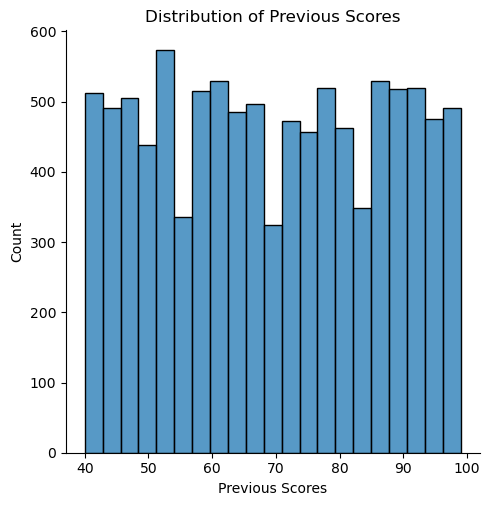

In [5]:
fig = plt.figure(figsize=(4,3))
sns.displot(data['Previous Scores'])
plt.title('Distribution of Previous Scores')
plt.show()

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 400x300 with 0 Axes>

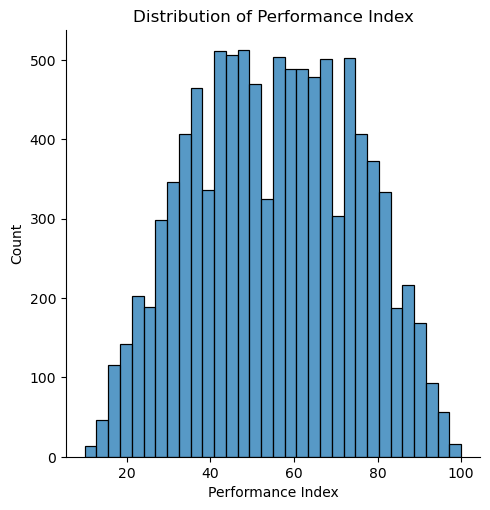

In [6]:
fig = plt.figure(figsize=(4,3))
sns.displot(data['Performance Index'])
plt.title('Distribution of Performance Index')
plt.show()

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 400x300 with 0 Axes>

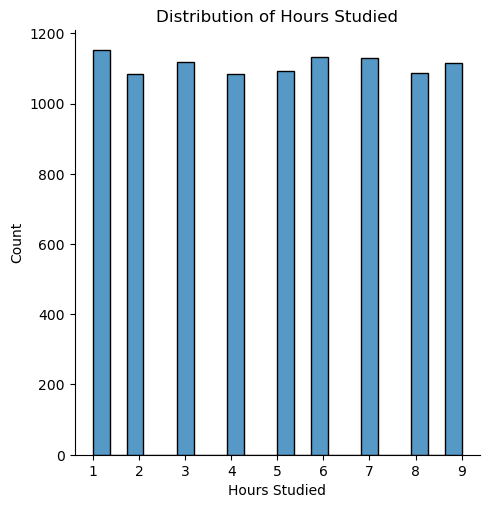

In [7]:
fig = plt.figure(figsize=(4,3))
sns.displot(data['Hours Studied'])
plt.title('Distribution of Hours Studied')
plt.show()

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 400x300 with 0 Axes>

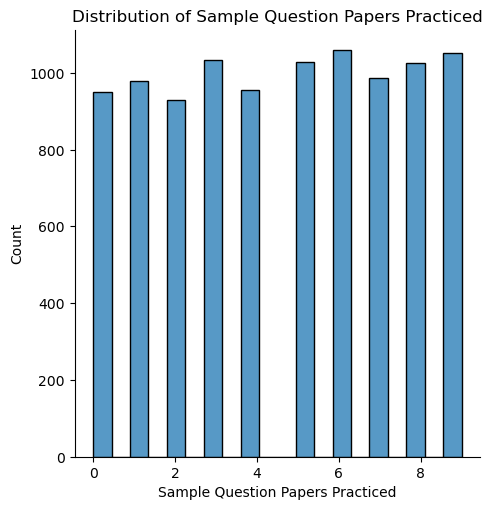

In [8]:
fig = plt.figure(figsize=(4,3))
sns.displot(data['Sample Question Papers Practiced'])
plt.title('Distribution of Sample Question Papers Practiced')
plt.show()

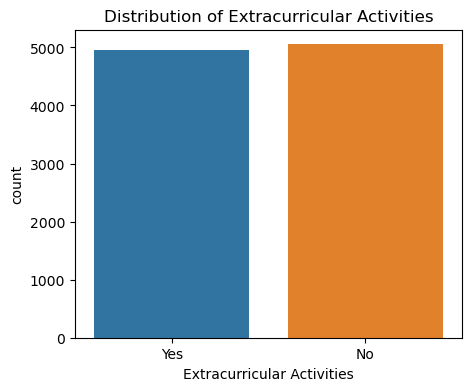

In [9]:
fig = plt.figure(figsize=(5,4))
sns.countplot(x = 'Extracurricular Activities', data = data)
plt.title('Distribution of Extracurricular Activities')
plt.show()

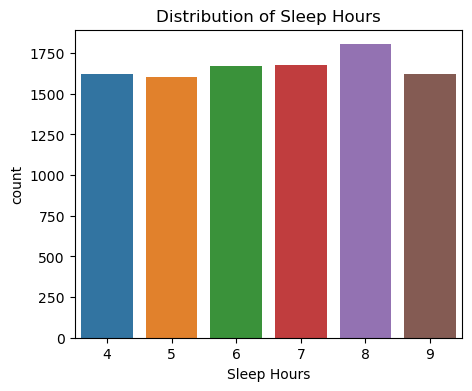

In [10]:
fig = plt.figure(figsize=(5,4))
sns.countplot(x = 'Sleep Hours', data = data)
plt.title('Distribution of Sleep Hours')
plt.show()

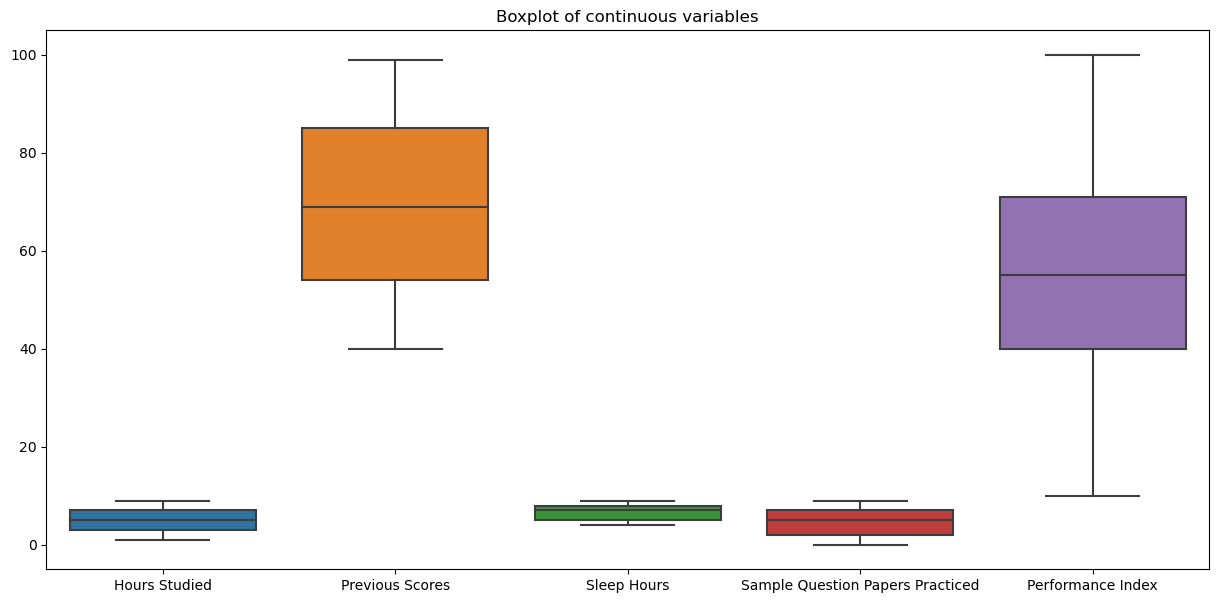

In [11]:
fig = plt.figure(figsize=(15,7))
sns.boxplot(data = data)
plt.title('Boxplot of continuous variables')
plt.show()

In [12]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

In [13]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66


In [14]:
data.shape

(10000, 6)

In [15]:
X = data.drop('Performance Index', axis = 1)
y = data['Performance Index']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state =42)
X_train.shape,X_test.shape

((8000, 5), (2000, 5))

#### (a) KNN

In [17]:
# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2=[]
from sklearn import metrics
for i in range(1,20):
    neigh=KNeighborsRegressor(n_neighbors=i).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    r2.append(metrics.r2_score(y_test,yhat))

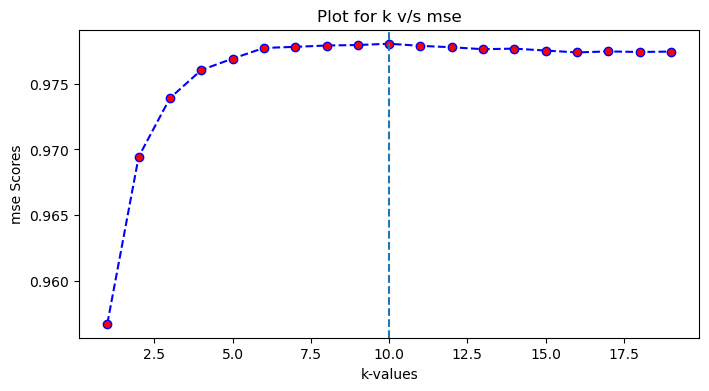

Maximum value of r2_score is: 0.9780320777912732 at k = 10


In [19]:
plt.figure(figsize=(8,4))
plt.plot(range(1,20),r2,linestyle="--",marker="o",color="blue",markerfacecolor='red')
plt.axvline(r2.index(max(r2))+1,linestyle="--")
plt.xlabel("k-values")
plt.ylabel("mse Scores")
plt.title("Plot for k v/s mse")
plt.show()
print("Maximum value of r2_score is:", max(r2), "at k =",r2.index(max(r2))+1)

#### (b) Decision Tree

#### DO NOT USE STANDARDIZED DATA OTHERWISE INTERPRETATION IS NOT POSSIBLE

In [20]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth= 3)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

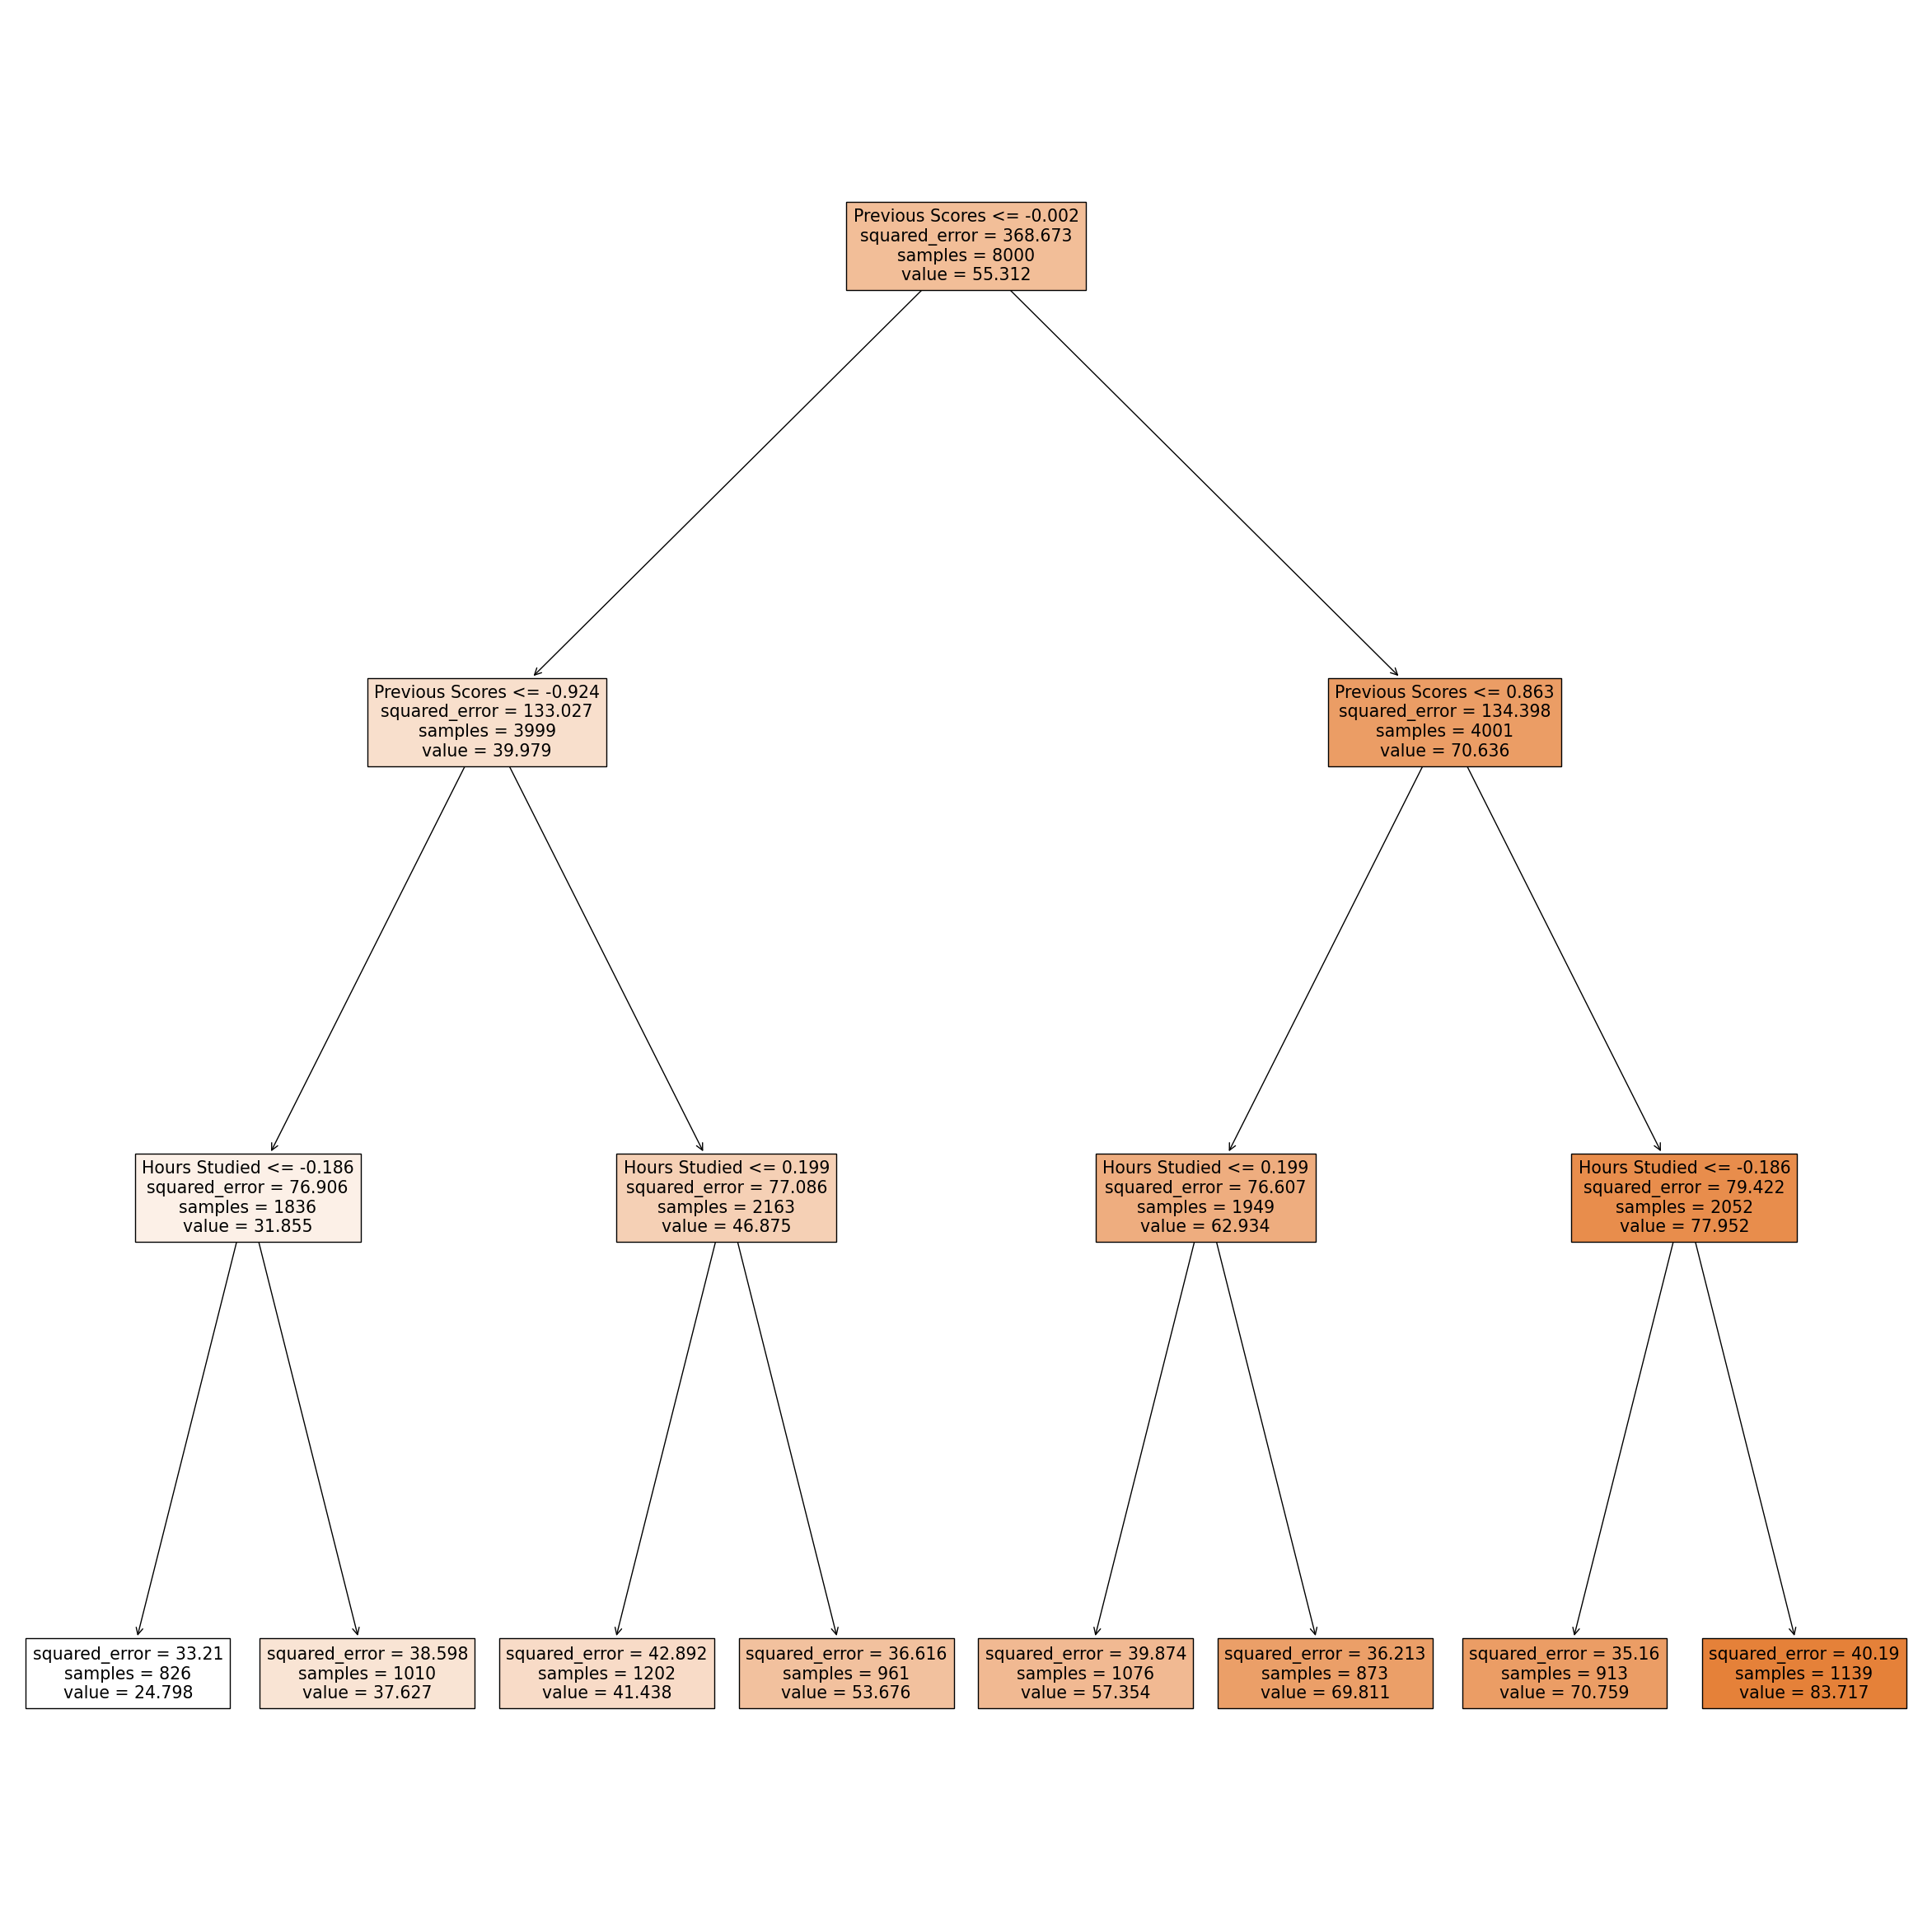

In [21]:
from sklearn import tree
fig = plt.figure(figsize = (30,30))
tree.plot_tree(dt,filled =True,feature_names =X.columns.tolist())
plt.show()

In [22]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [23]:
from sklearn.metrics import r2_score
score = r2_score(y_test_pred,y_test)
print('The r2_score is =', score)

The r2_score is = 0.8762541568036316


#### (c) Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 100, max_samples = 0.7, random_state = 42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print(y_pred)

[56.         22.12       46.79       ... 15.47       62.87666667
 45.41      ]


In [25]:
from sklearn import metrics
print('r2_score of the model : ', metrics.r2_score(y_test,y_pred))

r2_score of the model :  0.9866941025141204


In [26]:
feature_imp = pd.Series(rfr.feature_importances_,index = X.columns).sort_values(ascending = False)
print(feature_imp)

Previous Scores                     0.847816
Hours Studied                       0.140925
Sample Question Papers Practiced    0.005112
Sleep Hours                         0.004819
Extracurricular Activities          0.001328
dtype: float64


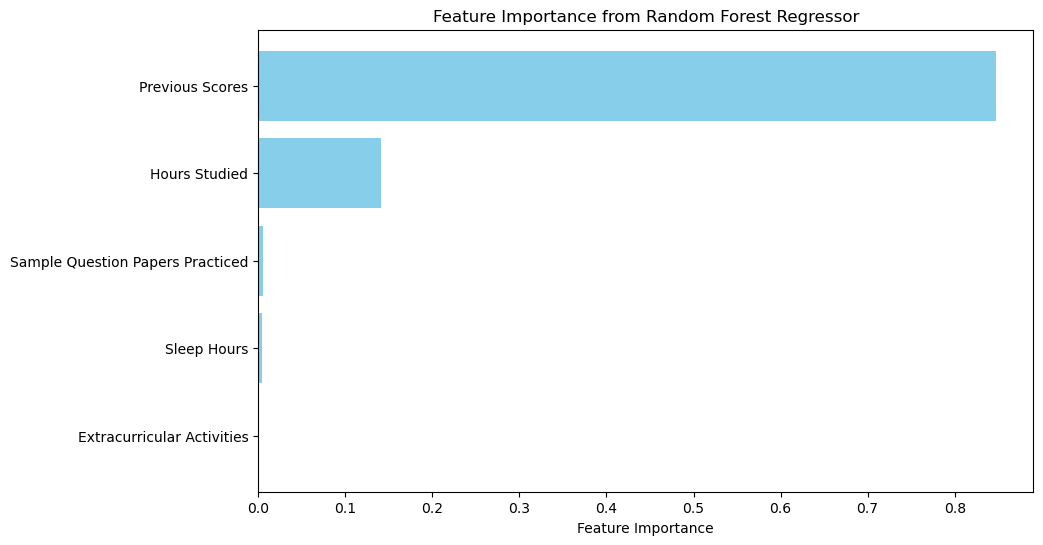

In [27]:
import matplotlib.pyplot as plt

# Plot the feature importance
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.barh(feature_imp.index, feature_imp.values, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest Regressor')
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top
plt.show()